<a href="https://colab.research.google.com/github/muhammadalfateh6/Muhammad_Alfateh_Work/blob/main/MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import matplotlib.pyplot as plt
import numpy as npp
import pandas as pdd

In [2]:
model = Sequential([
    Conv2D(16, (3,3), input_shape=(28,28,1), padding='same', strides=1, activation='relu'),
    MaxPool2D((3,3)),
    Conv2D(8, (3,3), padding='same', strides=1, activation='relu'),
    MaxPool2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [3]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
              loss ='sparse_categorical_crossentropy',
              metrics=[acc, mae])

In [4]:
mnist =tf.keras.datasets.mnist #tf.keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_images.shape

(60000, 28, 28)

In [5]:
labels = [
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9'
]
print(train_labels[53])

4


the label is: 2


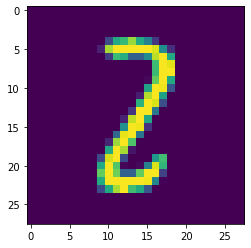

In [8]:
train_images = train_images/ 255.
test_images = test_images/ 255.

i=646
im = train_images[i,:,:]
plt.imshow(im)
print(f"the label is: {labels[train_labels[i]]}")

In [9]:
history = model.fit(train_images[...,npp.newaxis], train_labels, epochs=8, batch_size=256, verbose=1)

Epoch 1/8
235/235 [==============================] - 22s 91ms/step - loss: 0.4829 - sparse_categorical_accuracy: 0.8502 - mean_absolute_error: 4.3737
Epoch 2/8
235/235 [==============================] - 21s 91ms/step - loss: 0.1423 - sparse_categorical_accuracy: 0.9556 - mean_absolute_error: 4.3737
Epoch 3/8
235/235 [==============================] - 21s 90ms/step - loss: 0.1089 - sparse_categorical_accuracy: 0.9662 - mean_absolute_error: 4.3737
Epoch 4/8
235/235 [==============================] - 20s 84ms/step - loss: 0.0954 - sparse_categorical_accuracy: 0.9701 - mean_absolute_error: 4.3737
Epoch 5/8
235/235 [==============================] - 21s 89ms/step - loss: 0.0846 - sparse_categorical_accuracy: 0.9734 - mean_absolute_error: 4.3737
Epoch 6/8
235/235 [==============================] - 20s 84ms/step - loss: 0.0809 - sparse_categorical_accuracy: 0.9753 - mean_absolute_error: 4.3737
Epoch 7/8
235/235 [==============================] - 21s 89ms/step - loss: 0.0734 - sparse_categoric

In [10]:
df = pdd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.482911,0.850167,4.373677
1,0.142328,0.955550,4.373674
2,0.108917,0.966217,4.373675
3,0.095366,0.970067,4.373677
4,0.084584,0.973417,4.373677


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

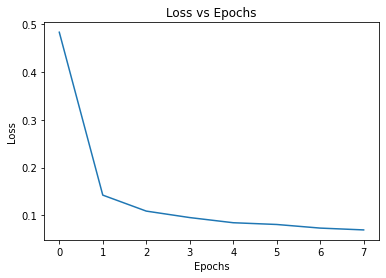

In [11]:
lossplot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
lossplot.set(xlabel="Epochs", ylabel="Loss")

In [12]:
evaluation = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0.9816 - mean_absolute_error: 4.3630


Label: 2


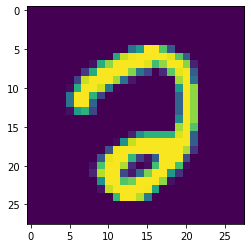

In [18]:
idx = 939
theimage= test_images[idx]
plt.imshow(theimage)
print(f"Label: {labels[test_labels[idx]]}")

In [19]:
pred = model.predict(theimage[npp.newaxis,...,npp.newaxis])
print(f"Prediction: {labels[npp.argmax(pred)]}")

1/1 [==============================] - 0s 32ms/step
Prediction: 2
